## Toxic: PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [2]:
df = pd.read_pickle('../data/toxictrain.pkl')
print(df.shape)
df.head()

(159571, 24)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,category,rating,...,sent_token,polarity_sentence,polarity_comment,polarity_comment_s,word_count,char_count,char_count_s,polarity_min,polarity_max,polarity_mean
idx,,,,,,,,,,,,,,,,,,,,,
3a4c7758fad18de3,3a4c7758fad18de3,", I hope your retarded kids get anal raped and...",1,1,1,1,1,1,ToSTObThInIH,6,...,"[, I hope your retarded kids get anal raped an...","(-0.6, 1.0, -0.01875, [-0.4, -0.4, 0.55, 0.15,...",0.00,0.00,94,494,494,-0.6000,1.0000,-0.018750
24d2b50726b67167,24d2b50726b67167,I am going to murder ZimZalaBim ST47 for being...,1,1,1,1,1,1,ToSTObThInIH,6,...,[I am going to murder ZimZalaBim ST47 for bein...,"(-1.0, -1.0, -1.0, [-1.0])",0.00,0.00,12,68,68,-1.0000,-1.0000,-1.000000
c586b7a2fd575b13,c586b7a2fd575b13,"Shut up you asswipe, we don't care. I'll decap...",1,1,1,1,1,1,ToSTObThInIH,6,...,"[Shut up you asswipe, we don't care., I'll dec...","(-0.2, 0.0, -0.0755555555556, [0.0, -0.1777777...",-0.25,-0.25,24,3890,1000,-0.2000,0.0000,-0.075556
77d84b1321c22d9a,77d84b1321c22d9a,"LGBT \n\nyou little fuck , are you a fag , tha...",1,1,1,1,1,1,ToSTObThInIH,6,...,"[LGBT \n\nyou little fuck , are you a fag , th...","(-0.1775, 0.0, -0.08875, [-0.17750000000000005...",0.00,0.00,56,280,280,-0.1775,0.0000,-0.088750
1368c10281978876,1368c10281978876,"You're a stupid cunt \n\nFuck you dumb arse, y...",1,1,1,1,1,1,ToSTObThInIH,6,...,"[You're a stupid cunt \n\nFuck you dumb arse, ...","(-0.4125, -0.4125, -0.4125, [-0.41250000000000...",0.00,0.00,59,278,278,-0.4125,-0.4125,-0.412500


In [3]:
class DenseTransformer(TransformerMixin):
    
    def transform(self,X,y=None,**fit_params):
        return X.todense()
    
    def fit_transform(self,X,y=None,**fit_params):
        self.fit(X,y,**fit_params)
        return self.transform(X)
    
    def fit(self,X,y=None, **fit_params):
        return self

In [4]:
# pipe = Pipeline([('vect', CountVectorizer(stop_words='english')),
#                      ('to_dense', DenseTransformer()),
#                      ('pca', PCA(n_components=2))])

In [5]:
from sklearn.decomposition import TruncatedSVD

data = df.comment_text_s
count_vectorizer = CountVectorizer(ngram_range=(1, 3),  stop_words='english', max_df=0.02, token_pattern="\\b[a-z][a-z]+\\b")
count_vectorizer.fit(data)
counts = count_vectorizer.transform(data).transpose()

In [6]:
clf = TruncatedSVD(n_components=15)
Xpca = clf.fit_transform(counts)

In [7]:
Xpca

array([[  3.08201612e-05,   2.91952123e-05,   2.02721325e-03, ...,
          7.53976351e-04,   1.62072949e-02,   1.20294144e-03],
       [  6.43776837e-07,   1.78410246e-06,   2.24947684e-05, ...,
         -1.40996504e-05,   3.07983725e-03,   1.21587222e-04],
       [  3.21885522e-07,   8.92033032e-07,   1.12473451e-05, ...,
         -7.04982520e-06,   1.53991862e-03,   6.07936102e-05],
       ..., 
       [  4.55799415e-07,  -2.25950412e-07,   9.61377600e-06, ...,
          8.63837064e-06,   2.70659349e-05,   1.51782219e-05],
       [  9.11598831e-08,  -4.51900824e-08,   1.92275520e-06, ...,
          1.72767413e-06,   5.41318698e-06,   3.03564437e-06],
       [  3.64639532e-07,  -1.80760330e-07,   7.69102080e-06, ...,
          6.91069651e-06,   2.16527479e-05,   1.21425775e-05]])

In [8]:
# pca = PCA(n_components=2)

In [9]:
# pca.fit(denser)

In [10]:
# x_pca = pipe.fit_transform(data)

In [11]:
counts.shape

(5348950, 159571)

In [12]:
Xpca.shape

(5348950, 15)

Text(0,0.5,'Second Principal Component')

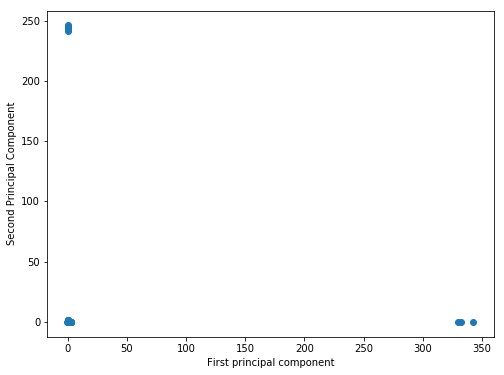

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(Xpca[:,0],Xpca[:,1],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [16]:
clf.components_

array([[  1.82743982e-05,   3.35779401e-08,   8.11019969e-06, ...,
          9.29239613e-08,   9.50013021e-09,   1.32548331e-07],
       [  1.52280477e-06,   4.34677539e-09,   1.77059700e-06, ...,
          1.06666046e-07,   5.34769834e-08,   3.23395764e-07],
       [  4.82266210e-03,   7.22599223e-07,   1.74912953e-03, ...,
          2.06665973e-06,   5.03865877e-07,   5.43170595e-06],
       ..., 
       [ -2.31605867e-05,   9.31218565e-07,   5.34167475e-05, ...,
          6.36508954e-06,   7.02471815e-07,   2.16307830e-05],
       [  1.43817705e-03,   6.66751150e-07,   1.38486579e-05, ...,
          5.21103138e-06,   1.07177539e-06,   9.13382942e-06],
       [  5.40327336e-05,   3.91137302e-06,   4.34916945e-05, ...,
          1.59660692e-05,   1.51544722e-06,   7.46371745e-05]])

In [18]:
df_comp = pd.DataFrame(clf.components_)

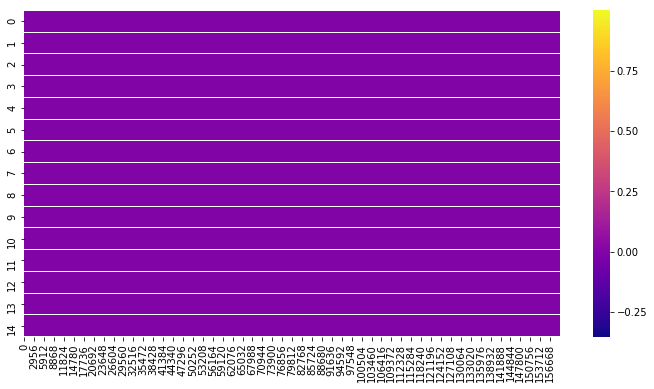

In [19]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [ ]:
# Authors: Robert McGibbon, Joel Nothman, Guillaume Lemaitre

# from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

print(__doc__)

pipe = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('to_dense', DenseTransformer()),
    ('reduce_dim', PCA()),
    ('classify', LinearSVC())
])

N_FEATURES_OPTIONS = [2, 4, 8]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
]
reducer_labels = ['PCA', 'NMF', 'KBest(chi2)']

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid)
# digits = load_digits()
grid.fit(df.comment_text_s, df.toxic)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Digit classification accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')

In [ ]:
# http://scikit-learn.org/stable/auto_examples/plot_multilabel.html#sphx-glr-auto-examples-plot-multilabel-py
# print(__doc__)

# import numpy as np
# import matplotlib.pyplot as plt

# from sklearn.datasets import make_multilabel_classification
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.svm import SVC
# from sklearn.preprocessing import LabelBinarizer
# from sklearn.decomposition import PCA
# from sklearn.cross_decomposition import CCA


# def plot_hyperplane(clf, min_x, max_x, linestyle, label):
#     # get the separating hyperplane
#     w = clf.coef_[0]
#     a = -w[0] / w[1]
#     xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
#     yy = a * xx - (clf.intercept_[0]) / w[1]
#     plt.plot(xx, yy, linestyle, label=label)


# def plot_subfigure(X, Y, subplot, title, transform):
#     if transform == "pca":
#         X = PCA(n_components=2).fit_transform(X)
#     elif transform == "cca":
#         X = CCA(n_components=2).fit(X, Y).transform(X)
#     else:
#         raise ValueError

#     min_x = np.min(X[:, 0])
#     max_x = np.max(X[:, 0])

#     min_y = np.min(X[:, 1])
#     max_y = np.max(X[:, 1])

#     classif = OneVsRestClassifier(SVC(kernel='linear'))
#     classif.fit(X, Y)

#     plt.subplot(2, 2, subplot)
#     plt.title(title)

#     zero_class = np.where(Y[:, 0])
#     one_class = np.where(Y[:, 1])
#     plt.scatter(X[:, 0], X[:, 1], s=40, c='gray', edgecolors=(0, 0, 0))
#     plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b',
#                 facecolors='none', linewidths=2, label='Class 1')
#     plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange',
#                 facecolors='none', linewidths=2, label='Class 2')

#     plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--',
#                     'Boundary\nfor class 1')
#     plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k-.',
#                     'Boundary\nfor class 2')
#     plt.xticks(())
#     plt.yticks(())

#     plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
#     plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
#     if subplot == 2:
#         plt.xlabel('First principal component')
#         plt.ylabel('Second principal component')
#         plt.legend(loc="upper left")


# plt.figure(figsize=(8, 6))

# X, Y = make_multilabel_classification(n_classes=2, n_labels=1,
#                                       allow_unlabeled=True,
#                                       random_state=1)

# plot_subfigure(X, Y, 1, "With unlabeled samples + CCA", "cca")
# plot_subfigure(X, Y, 2, "With unlabeled samples + PCA", "pca")

# X, Y = make_multilabel_classification(n_classes=2, n_labels=1,
#                                       allow_unlabeled=False,
#                                       random_state=1)

# plot_subfigure(X, Y, 3, "Without unlabeled samples + CCA", "cca")
# plot_subfigure(X, Y, 4, "Without unlabeled samples + PCA", "pca")

# plt.subplots_adjust(.04, .02, .97, .94, .09, .2)
# plt.show()